<a href="https://colab.research.google.com/github/JGCMachado/Trabalhos/blob/main/C%C3%B3pia_de_MVP3_Emendas_Parlamentares_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP de Engenharia de Dados
Profs. Victor Almeida e Silvio Alonso

##Aluno: José Guilherme Campos Machado

Este notebook é referente ao MVP da terceira sprint (Engenharia de Dados) do curso de Pós-Graduação em Ciência de Dados e Analytics da PUC-RJ



##1.0 Descrição do  Notebook

In [ ]:
# Importação biblioteca Pandas
import pandas as pd

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Dicionário de mapeamento de nomes de estados para siglas de UFs
mapeamento_estado_uf = {
    'ACRE': 'AC',
    'ALAGOAS': 'AL',
    'AMAPÁ': 'AP',
    'AMAZONAS': 'AM',
    'BAHIA': 'BA',
    'CEARÁ': 'CE',
    'DISTRITO FEDERAL': 'DF',
    'ESPÍRITO SANTO': 'ES',
    'GOIÁS': 'GO',
    'MARANHÃO': 'MA',
    'MATO GROSSO': 'MT',
    'MATO GROSSO DO SUL': 'MS',
    'MINAS GERAIS': 'MG',
    'PARÁ': 'PA',
    'PARAÍBA': 'PB',
    'PARANÁ': 'PR',
    'PERNAMBUCO': 'PE',
    'PIAUÍ': 'PI',
    'RIO DE JANEIRO': 'RJ',
    'RIO GRANDE DO NORTE': 'RN',
    'RIO GRANDE DO SUL': 'RS',
    'RONDÔNIA': 'RO',
    'RORAIMA': 'RR',
    'SANTA CATARINA': 'SC',
    'SÃO PAULO': 'SP',
    'SERGIPE': 'SE',
    'TOCANTINS': 'TO'
}

# Função para definir o tipo da abrangência do gasto da emenda com base na coluna Localidade do gasto
def definir_abrangencia_emenda(row):
    if '(UF)' in row['Localidade do gasto']:
        return 'Estadual'
    elif 'Nacional' in row['Localidade do gasto']:
        return 'Nacional'
    else:
        return 'Municipal'


# Função para definir o valor da coluna 'abrangencia_sigla' com base nas condições
def definir_abrangencia_sigla(localidade):
    if ' - ' in localidade:
        return localidade.split(' - ')[1]
    elif ' (UF)' in localidade:
        estado = localidade.split(' (UF)')[0]
        return mapeamento_estado_uf.get(estado, estado)  # Usar o mapeamento para obter a sigla da UF
    elif 'Nacional' in localidade:
        return 'BR'
    else:
        return None  # Caso padrão, pode ser ajustado conforme necessário


##2.0 Carga de Dados

A importação do dataset será através do pacote Pandas (Python Data Analysis Library), um arquivo .csv com cabeçalho disponibilizado no github.


In [ ]:
# O arquivo já contem o cabeçalho
# Carrega a variavel com o endereço do arquivo no github que contem o dataset
filename = "https://raw.githubusercontent.com/JGCMachado/Datasets/main/emendas.csv"
delimitador = ';'

# carga do dataset adicionando os nomes das colunas
emendas = pd.read_csv(filename, delimiter=delimitador)

###2.1 Verificação do dataset

Verificando os dados importados

In [ ]:
# verifica o tipo do dataset heart_disease
print(type(emendas))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# exibe as primeiras linhas para verificar se a importação ocorreu de acordo com o esperado
emendas.head(5)

,Código da Emenda,Ano da Emenda,Tipo de Emenda,Código do Autor da Emenda,Nome do Autor da Emenda,Número da emenda,Localidade do gasto,Código Função,Nome Função,Código Subfunção,Nome Subfunção,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos A Pagar Inscritos,Valor Restos A Pagar Cancelados,Valor Restos A Pagar Pagos
0,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,SÃO JOÃO DO CARÚ - MA,10,Saúde,301,Atenção básica,1253150,0,0,0,0,1253150
1,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,BORBA - AM,10,Saúde,122,Administração geral,999958,0,0,0,0,999958
2,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,Nacional,13,Cultura,392,Difusão cultural,"1665560,68",150860,0,0,"243083,14","1422477,54"
3,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,MARANHÃO (UF),18,Gestão ambiental,544,Recursos hídricos,500000,0,0,0,500000,0
4,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,PERNAMBUCO (UF),10,Saúde,302,Assistência hospitalar e ambulatorial,"23826320,09",0,0,0,"6463502,51","17362817,58"


In [ ]:
# Mostra as dimensões do dataset
print(emendas.shape)

(59138, 17)


##3.0 Inclusão de colunas

Inclusão das colunas 'Abrangencia Emenda' e 'Abrangencia Sigla' baseadas no conteudo da coluna 'Localidade do gasto'

In [ ]:
# Aplicar a função para criar a coluna 'Abrangencia Emenda'
emendas['Abrangencia Emenda'] = emendas.apply(definir_abrangencia_emenda, axis=1)

In [ ]:
# Aplicar a função para criar a coluna 'Abrangencia Sigla'
emendas['Abrangencia Sigla'] = emendas['Localidade do gasto'].apply(definir_abrangencia_sigla)


In [ ]:
# exibe as primeiras linhas para verificar se a importação ocorreu de acordo com o esperado
emendas.head(5)

,Código da Emenda,Ano da Emenda,Tipo de Emenda,Código do Autor da Emenda,Nome do Autor da Emenda,Número da emenda,Localidade do gasto,Código Função,Nome Função,Código Subfunção,Nome Subfunção,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos A Pagar Inscritos,Valor Restos A Pagar Cancelados,Valor Restos A Pagar Pagos,Abrangencia Emenda,Abrangencia Sigla
0,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,SÃO JOÃO DO CARÚ - MA,10,Saúde,301,Atenção básica,1253150,0,0,0,0,1253150,Municipal,MA
1,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,BORBA - AM,10,Saúde,122,Administração geral,999958,0,0,0,0,999958,Municipal,AM
2,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,Nacional,13,Cultura,392,Difusão cultural,"1665560,68",150860,0,0,"243083,14","1422477,54",Nacional,BR
3,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,MARANHÃO (UF),18,Gestão ambiental,544,Recursos hídricos,500000,0,0,0,500000,0,Estadual,MA
4,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,PERNAMBUCO (UF),10,Saúde,302,Assistência hospitalar e ambulatorial,"23826320,09",0,0,0,"6463502,51","17362817,58",Estadual,PE


In [ ]:
# Mostra as informações do dataset
print(emendas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59138 entries, 0 to 59137
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Código da Emenda                 59138 non-null  object
 1   Ano da Emenda                    59138 non-null  int64 
 2   Tipo de Emenda                   59138 non-null  object
 3   Código do Autor da Emenda        59138 non-null  object
 4   Nome do Autor da Emenda          59138 non-null  object
 5   Número da emenda                 59138 non-null  object
 6   Localidade do gasto              59138 non-null  object
 7   Código Função                    59138 non-null  object
 8   Nome Função                      59138 non-null  object
 9   Código Subfunção                 59138 non-null  object
 10  Nome Subfunção                   59138 non-null  object
 11  Valor Empenhado                  59138 non-null  object
 12  Valor Liquidado                 

O total de registros do novo campo Abrangência Sigla é menor porque para as emendas parlamentares de âmbito nacional o conteudo do campo é nulo.

##5.0 Salvando o dataset alterado

Nessa sessão o dataset é salvo no disco efêmero do Colab. Na sequencia realizei um download do mesmo para subir em um Bucket S3 no ambiente da AWS


In [ ]:
# Salvar o DataFrame como um arquivo CSV com codificação UTF-8
emendas.to_csv('emendas_parlamentares.csv', sep=';', index=False, encoding='utf-8-sig')

##6.0 Considerações.

Este notebook não tem a intenção de ser o processo de ETL deste trabalho, o dataset resultante será o imput inicial para o trabalho no ambiente cloud da AWS




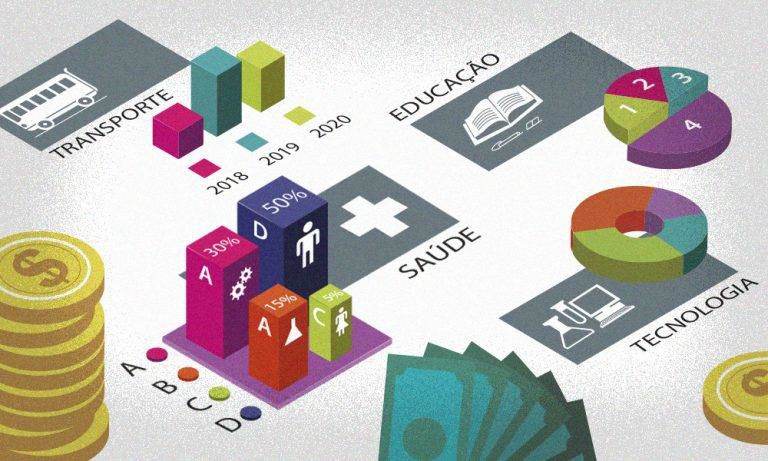